<a href="https://colab.research.google.com/github/Evgenius87/Data_Science_hw/blob/main/Hw2_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


Прочитайте csv файл (використовуйте функцію read_csv)

Виведіть перші п'ять рядків (використовується функція head)

In [ ]:
id = '1XsH72i6REptrduK0LZ28PUIShrjflHi5'
url = 'https://drive.google.com'
full_url = f'{url}/uc?id={id}'
df = pd.read_csv(full_url)
df.head()

,Name,Author,User Rating,Reviews,Price,Year,Genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,Non Fiction
1,11/22/63: A Novel,Stephen King,4.6,2052,22,2011,Fiction
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15,2018,Non Fiction
3,1984 (Signet Classics),George Orwell,4.7,21424,6,2017,Fiction
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,12,2019,Non Fiction


Виведіть розміри датасету (використовуйте атрибут shape)

In [ ]:
df.shape
print(f'rows: {df.shape[0]}\ncolumns: {df.shape[1]}')

rows: 550
columns: 7


Про скільки книг зберігає дані датасет?
Відповідь: Про 550 книг

змінимо регістр на малий, а пробіл замінимо на нижнє підкреслення

In [ ]:
df.columns = ['name', 'author', 'user_rating', 'reviews', 'price', 'year', 'genre']
df.head()

,name,author,user_rating,reviews,price,year,genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,Non Fiction
1,11/22/63: A Novel,Stephen King,4.6,2052,22,2011,Fiction
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15,2018,Non Fiction
3,1984 (Signet Classics),George Orwell,4.7,21424,6,2017,Fiction
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,12,2019,Non Fiction


Перевірте, чи у всіх рядків вистачає даних: виведіть кількість пропусків (na) у кожному зі стовпців (використовуйте функції isna та sum)

In [ ]:
df.isna().sum()

name           0
author         0
user_rating    0
reviews        0
price          0
year           0
genre          0
dtype: int64

Чи є в якихось змінних пропуски? (Так / ні)
Відповідь: ні

Перевірте, які є унікальні значення в колонці genre (використовуйте функцію unique)

In [ ]:
df['genre'].unique()

array(['Non Fiction', 'Fiction'], dtype=object)

Які є унікальні жанри? Відповідь: Non Fiction, Fiction

Тепер подивіться на розподіл цін: побудуйте діаграму (використовуйте kind='hist')

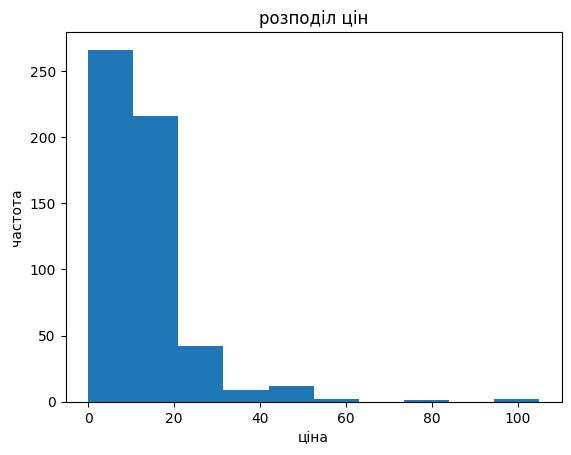

In [ ]:
df['price'].plot(kind='hist')
plt.xlabel('ціна')
plt.ylabel('частота')
plt.title('розподіл цін')
plt.show()

Визначте, яка ціна у нас максимальна, мінімальна, середня, медіанна (використовуйте функції max, min, mean, median)

In [ ]:
print('Відповідь: ')
print(f"максимальна ціна: {df['price'].max()}\nмінімальна ціна: {df['price'].min()}\nсередня ціна: {df['price'].mean()}\nмедіанна: {df['price'].median()}")

Відповідь: 
максимальна ціна: 105
мінімальна ціна: 0
середня ціна: 13.1
медіанна: 11.0


Який рейтинг у датасеті найвищий?

In [ ]:
print(f'Відповідь: найвищий рейтинг: {df["user_rating"].max()}')

Відповідь: найвищий рейтинг: 4.9


Скільки книг мають такий рейтинг?

In [ ]:
print(f'Відповідь: найвищий рейтинг мають {len(df["name"][df["user_rating"] == df["user_rating"].max()])} книги:')

Відповідь: найвищий рейтинг мають 52 книги:


Яка книга має найбільше відгуків?

In [ ]:
book = df['name'][df['reviews']==df['reviews'].max()]
print(f"Відповідь: найбільше відгуків має книга {book.values[0]}")

Відповідь: найбільше відгуків має книга Where the Crawdads Sing


З тих книг, що потрапили до Топ-50 у 2015 році, яка книга найдорожча (можна використати проміжний датафрейм)?

In [ ]:
books_in_2015 = df[df['year']== 2015]
top_50_books_in_2015 = books_in_2015.nlargest(50, 'user_rating')
most_expensive_book_in_2015 = top_50_books_in_2015[top_50_books_in_2015['price'] == top_50_books_in_2015['price'].max()].values[0][0]
print(f'Відповідь: найдорожча книга у 2015 році: {most_expensive_book_in_2015}')

Відповідь: найдорожча книга у 2015 році: Publication Manual of the American Psychological Association, 6th Edition


Скільки книг жанру Fiction потрапили до Топ-50 у 2010 році

In [ ]:
books_in_2010 = df[(df['year']== 2010) & (df['genre'] == 'Fiction')]
print(f'Відповідь: до Топ-50 у 2010 році потрапили {books_in_2010.shape[0]} книг жанру Fiction')

Відповідь: до Топ-50 у 2010 році потрапили 20 книг жанру Fiction


Скільки книг з рейтингом 4.9 потрапило до рейтингу у 2010 та 2011 роках (використовуйте | або функцію isin)?

In [ ]:
most_rating_books_in_10_11 = df[(df['user_rating']== 4.9) & ((df['year'] == 2010)|(df['year'] == 2011))]
print(f'Відповідь: до рейтингу у 2010 та 2011 роках потрапила {most_rating_books_in_10_11.shape[0]} книга з рейтингом 4.9')


Відповідь: до рейтингу у 2010 та 2011 роках потрапила 1 книга з рейтингом 4.9


відсортуємо за зростанням ціни всі книги, які потрапили до рейтингу в 2015 році і коштують дешевше за 8 доларів (використовуйте функцію sort_values).

In [ ]:
books_in_2015 = df[(df['year']== 2015) & (df['price'] < 8)]
books_in_2015

,name,author,user_rating,reviews,price,year,genre
16,Adult Coloring Book: Stress Relieving Animal D...,Blue Star Coloring,4.6,2925,6,2015,Non Fiction
17,Adult Coloring Book: Stress Relieving Patterns,Blue Star Coloring,4.4,2951,6,2015,Non Fiction
28,Baby Touch and Feel: Animals,DK,4.6,5360,5,2015,Non Fiction
54,Creative Haven Creative Cats Coloring Book (Ad...,Marjorie Sarnat,4.8,4022,4,2015,Non Fiction
55,Creative Haven Owls Coloring Book (Adult Color...,Marjorie Sarnat,4.8,3871,5,2015,Non Fiction
63,Dear Zoo: A Lift-the-Flap Book,Rod Campbell,4.8,10922,5,2015,Fiction
89,Dover Creative Haven Art Nouveau Animal Design...,Marty Noble,4.6,2134,5,2015,Non Fiction
111,First 100 Words,Roger Priddy,4.7,17323,4,2015,Non Fiction
123,Giraffes Can't Dance,Giles Andreae,4.8,14038,4,2015,Fiction
201,Killing Reagan: The Violent Assault That Chang...,Bill O'Reilly,4.6,5235,5,2015,Non Fiction


Яка книга остання у відсортованому списку?

In [ ]:
print(f'Відповідь: остання у відсортованому списку книга: {books_in_2015.sort_values("price").values[-1][0]}')

Відповідь: остання у відсортованому списку книга: Old School (Diary of a Wimpy Kid #10)


Для початку давайте подивимося на максимальну та мінімальну ціни для кожного з жанрів (використовуйте функції groupby та agg, для підрахунку мінімальних та максимальних значень використовуйте max та min). Не беріть усі стовпці, виберіть тільки потрібні вам

In [ ]:
max_min_genre_price = df[['genre', 'price']].groupby(['genre']).agg(['max', 'min'])
max_min_genre_price

price    
              max min
genre                
Fiction        82   0
Non Fiction   105   0

Відповідь: Максимальна ціна для жанру Fiction: Відповідь 82

Відповідь: Мінімальна ціна для жанру Fiction: Відповідь 0

Відповідь: Максимальна ціна для жанру Non Fiction: Відповідь 105

Відповідь: Мінімальна ціна для жанру Non Fiction: Відповідь 0

Тепер створіть новий датафрейм, який вміщатиме кількість книг для кожного з авторів (використовуйте функції groupby та agg, для підрахунку кількості використовуйте count). Не беріть усі стовпці, виберете тільки потрібні

In [ ]:
authors_books = df.groupby('author')['name'].agg(['count'])
authors_books

,count
author,
Abraham Verghese,2
Adam Gasiewski,1
Adam Mansbach,1
Adir Levy,1
Admiral William H. McRaven,1
...,...
Walter Isaacson,3
William Davis,2
William P. Young,2


Якої розмірності вийшла таблиця?

In [ ]:
print(f' Відповідь: розмірність таблиці: {authors_books.shape[0]} рядків і {authors_books.shape[1]} стовпців ')

 Відповідь: розмірність таблиці: 248 рядків і 1 стовпців 


Який автор має найбільше книг?

In [ ]:
cool_author = authors_books[authors_books['count']==authors_books['count'].max()]
cool_author

,count
author,
Jeff Kinney,12


Відповідь: Jeff Kinney

Тепер створіть другий датафрейм, який буде вміщати середній рейтинг для кожного автора (використовуйте функції groupby та agg, для підрахунку середнього значення використовуйте mean). Не беріть усі стовпці, виберете тільки потрібні

In [ ]:
authors_rating = df.groupby('author')['user_rating'].agg(['mean'])
authors_rating

,mean
author,
Abraham Verghese,4.600000
Adam Gasiewski,4.400000
Adam Mansbach,4.800000
Adir Levy,4.800000
Admiral William H. McRaven,4.700000
...,...
Walter Isaacson,4.566667
William Davis,4.400000
William P. Young,4.600000


У якого автора середній рейтинг мінімальний?

In [ ]:
authors_rating[authors_rating['mean']==authors_rating['mean'].min()]

,mean
author,
Donna Tartt,3.9


Відповідь: Donna Tartt

Який у цього автора середній рейтинг?

Відповідь: 3.9

З'єднайте останні два датафрейми так, щоб для кожного автора було видно кількість книг та середній рейтинг (Використовуйте функцію concat з параметром axis=1). Збережіть результат у змінну

In [ ]:
authors_success = pd.concat([authors_books, authors_rating], axis=1 )
authors_success

,count,mean
author,,
Abraham Verghese,2,4.600000
Adam Gasiewski,1,4.400000
Adam Mansbach,1,4.800000
Adir Levy,1,4.800000
Admiral William H. McRaven,1,4.700000
...,...,...
Walter Isaacson,3,4.566667
William Davis,2,4.400000
William P. Young,2,4.600000


Відсортуйте датафрейм за зростаючою кількістю книг та зростаючим рейтингом (використовуйте функцію sort_values)

In [ ]:
authors_success.sort_values(by=['count', 'mean'])

,count,mean
author,,
Muriel Barbery,1,4.000000
Chris Cleave,1,4.100000
Ian K. Smith M.D.,1,4.100000
Pierre Dukan,1,4.100000
Elizabeth Strout,1,4.200000
...,...,...
American Psychological Association,10,4.500000
Suzanne Collins,11,4.663636
Gary Chapman,11,4.736364


 Який автор перший у списку?

Відповідь: Muriel Barbery

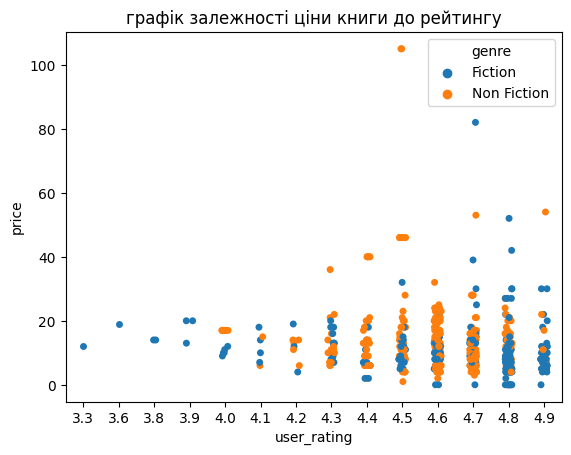

In [ ]:
import seaborn as sns
reviews_to_price = df[['price', 'user_rating', 'genre']]
reviews_to_price
sns.stripplot(x='user_rating', y='price', hue='genre', data=reviews_to_price)
plt.title('графік залежності ціни книги до рейтингу')
plt.show()

Висновок: На графіку видно з що немає залежності між ціною книги, жанром і рейтингом

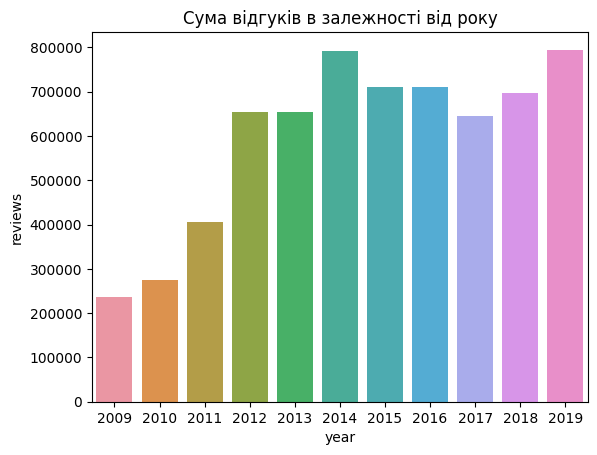

In [ ]:
year_data = df.groupby('year').agg({'reviews': 'sum'})
sns.barplot(data=year_data, y='reviews', x=year_data.index)
plt.title('Сума відгуків в залежності від року')
plt.show()

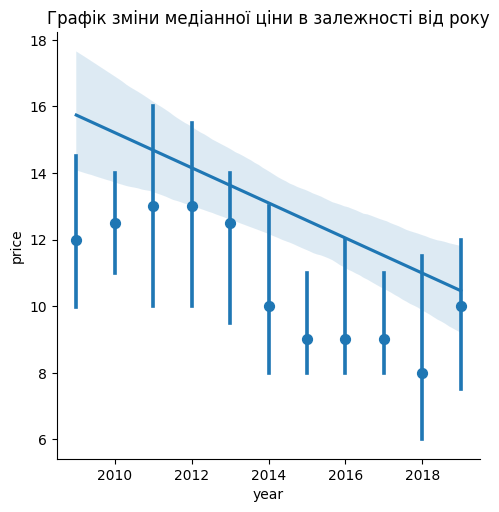

In [ ]:
from numpy import median
data = df.sort_values(by='user_rating', ascending=True)
sns.lmplot(data=data, x='year', y='price', x_estimator=median)
plt.title('Графік зміни медіанної ціни в залежності від року')
plt.show()

In [ ]:
data

,name,author,user_rating,reviews,price,year,genre
353,The Casual Vacancy,J.K. Rowling,3.3,9372,12,2012,Fiction
132,Go Set a Watchman: A Novel,Harper Lee,3.6,14982,19,2015,Fiction
106,Fifty Shades of Grey: Book One of the Fifty Sh...,E L James,3.8,47265,14,2012,Fiction
107,Fifty Shades of Grey: Book One of the Fifty Sh...,E L James,3.8,47265,14,2013,Fiction
393,The Goldfinch: A Novel (Pulitzer Prize for Fic...,Donna Tartt,3.9,33844,20,2014,Fiction
...,...,...,...,...,...,...,...
41,"Brown Bear, Brown Bear, What Do You See?",Bill Martin Jr.,4.9,14344,5,2019,Fiction
40,"Brown Bear, Brown Bear, What Do You See?",Bill Martin Jr.,4.9,14344,5,2017,Fiction
247,"Oh, the Places You'll Go!",Dr. Seuss,4.9,21834,8,2014,Fiction
146,"Goodnight, Goodnight Construction Site (Hardco...",Sherri Duskey Rinker,4.9,7038,7,2012,Fiction
